In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
df = pd.read_csv('./vehicles.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


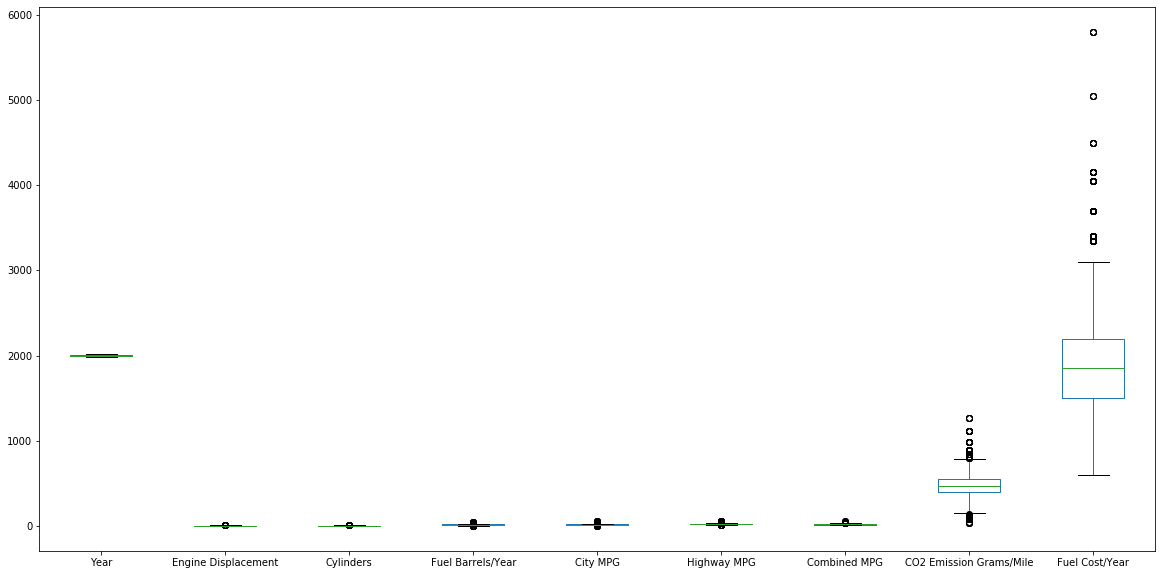

In [5]:
df.plot.box(figsize = (20,10))

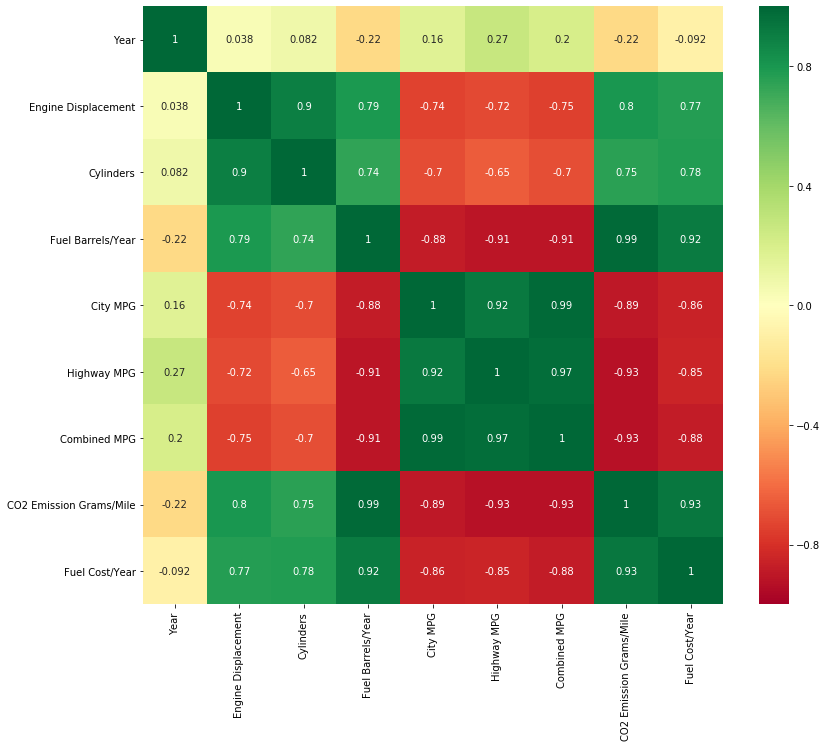

In [6]:
corr=df.corr()
fig, ax = plt.subplots(figsize = (13,11))
sns.heatmap(corr, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);


### I want to foresee 'Fuel Cost/Year'

In [7]:
df.dtypes

Make                        object
Model                       object
Year                         int64
Engine Displacement        float64
Cylinders                  float64
Transmission                object
Drivetrain                  object
Vehicle Class               object
Fuel Type                   object
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
dfnumeric = df.select_dtypes(include=numerics).copy()

In [9]:
dfnumeric.dtypes

Year                         int64
Engine Displacement        float64
Cylinders                  float64
Fuel Barrels/Year          float64
City MPG                     int64
Highway MPG                  int64
Combined MPG                 int64
CO2 Emission Grams/Mile    float64
Fuel Cost/Year               int64
dtype: object

In [10]:
dfnumeric.columns

Index(['Year', 'Engine Displacement', 'Cylinders', 'Fuel Barrels/Year',
       'City MPG', 'Highway MPG', 'Combined MPG', 'CO2 Emission Grams/Mile',
       'Fuel Cost/Year'],
      dtype='object')

In [11]:
X=dfnumeric[['City MPG', 'Highway MPG', 'Combined MPG']]
Y=dfnumeric['Fuel Cost/Year']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

/Users/marcherrera/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Fuel Cost/Year   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 3.934e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        10:58:06   Log-Likelihood:            -2.4879e+05
No. Observations:               35952   AIC:                         4.976e+05
Df Residuals:                   35948   BIC:                         4.976e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3628.9646      5.397    672.364      0.000    3618.386    3639.544
City MPG        19.1152      2.425      7.882      0.000      14.362      23.869
Highway MPG      3.7787      1.359      2.781      0.005       1.115       6.442
Combined MPG  -108.5794      3.527    -30.786      0.000    -115.492    -101.667
==============================================================================
Omnibus:                    14626.332   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89683.124
Skew:                           1.854   Prob(JB):                         0.00
Kurtosis:                       9.791   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

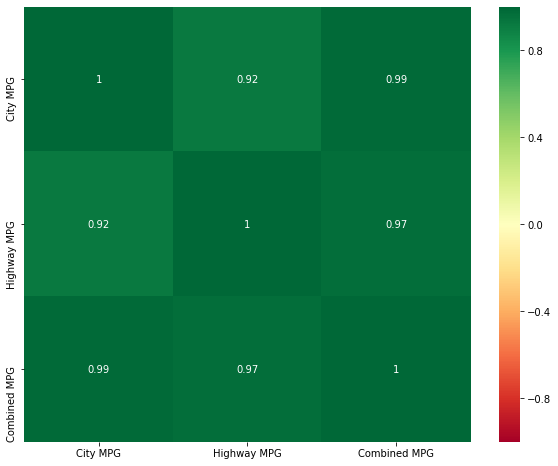

In [12]:
corr=dfnumeric[['City MPG', 'Highway MPG', 'Combined MPG']].corr()
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

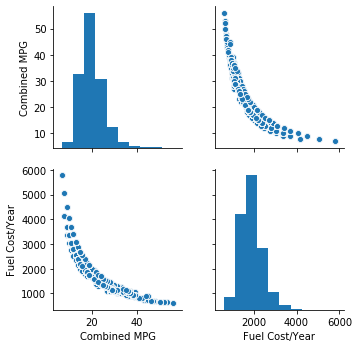

In [18]:
sns.pairplot(dfnumeric[[ 'Combined MPG', 'Fuel Cost/Year']])

In [15]:
dfnumeric=dfnumeric[['Year','Combined MPG', 'Fuel Cost/Year']].copy()

#Log it! :D

dfnumeric['Combined MPG LOG'] = np.log(dfnumeric['Combined MPG'])
dfnumeric['Combined MPG LOG2'] = np.log2(dfnumeric['Combined MPG'])

#Roots

dfnumeric['Combined MPG sqrt'] = np.sqrt(dfnumeric['Combined MPG'])
dfnumeric['Combined MPG cubrt'] = pow(dfnumeric['Combined MPG'],1/3)
dfnumeric['Combined MPG 4rt'] = pow(dfnumeric['Combined MPG'],1/4)

# 1/x

dfnumeric['Combined MPG 1/div'] = (1/dfnumeric['Combined MPG'])



dfnumeric['Combined MPG 1/div and logged'] = np.log(1/dfnumeric['Combined MPG'])


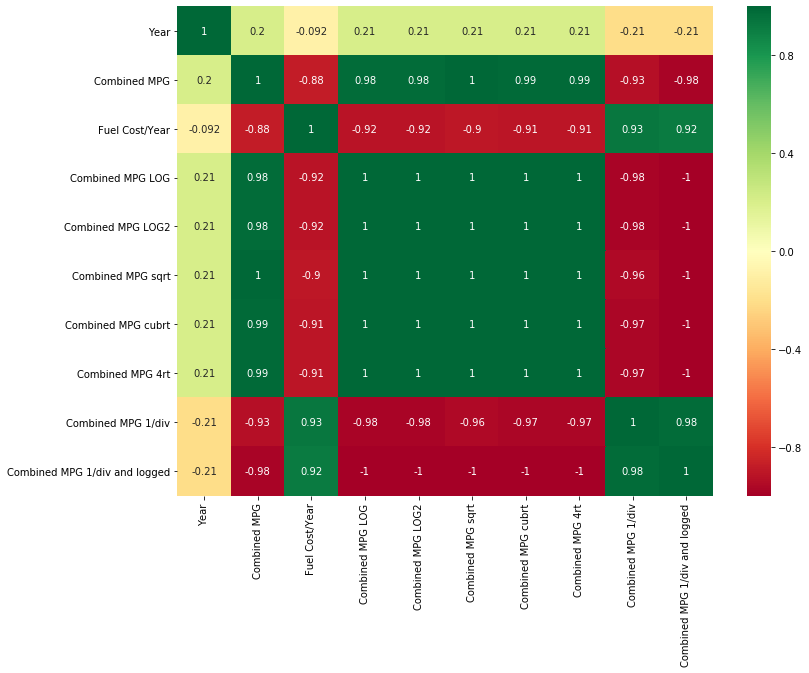

In [16]:
corr=dfnumeric.corr()
fig, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corr, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

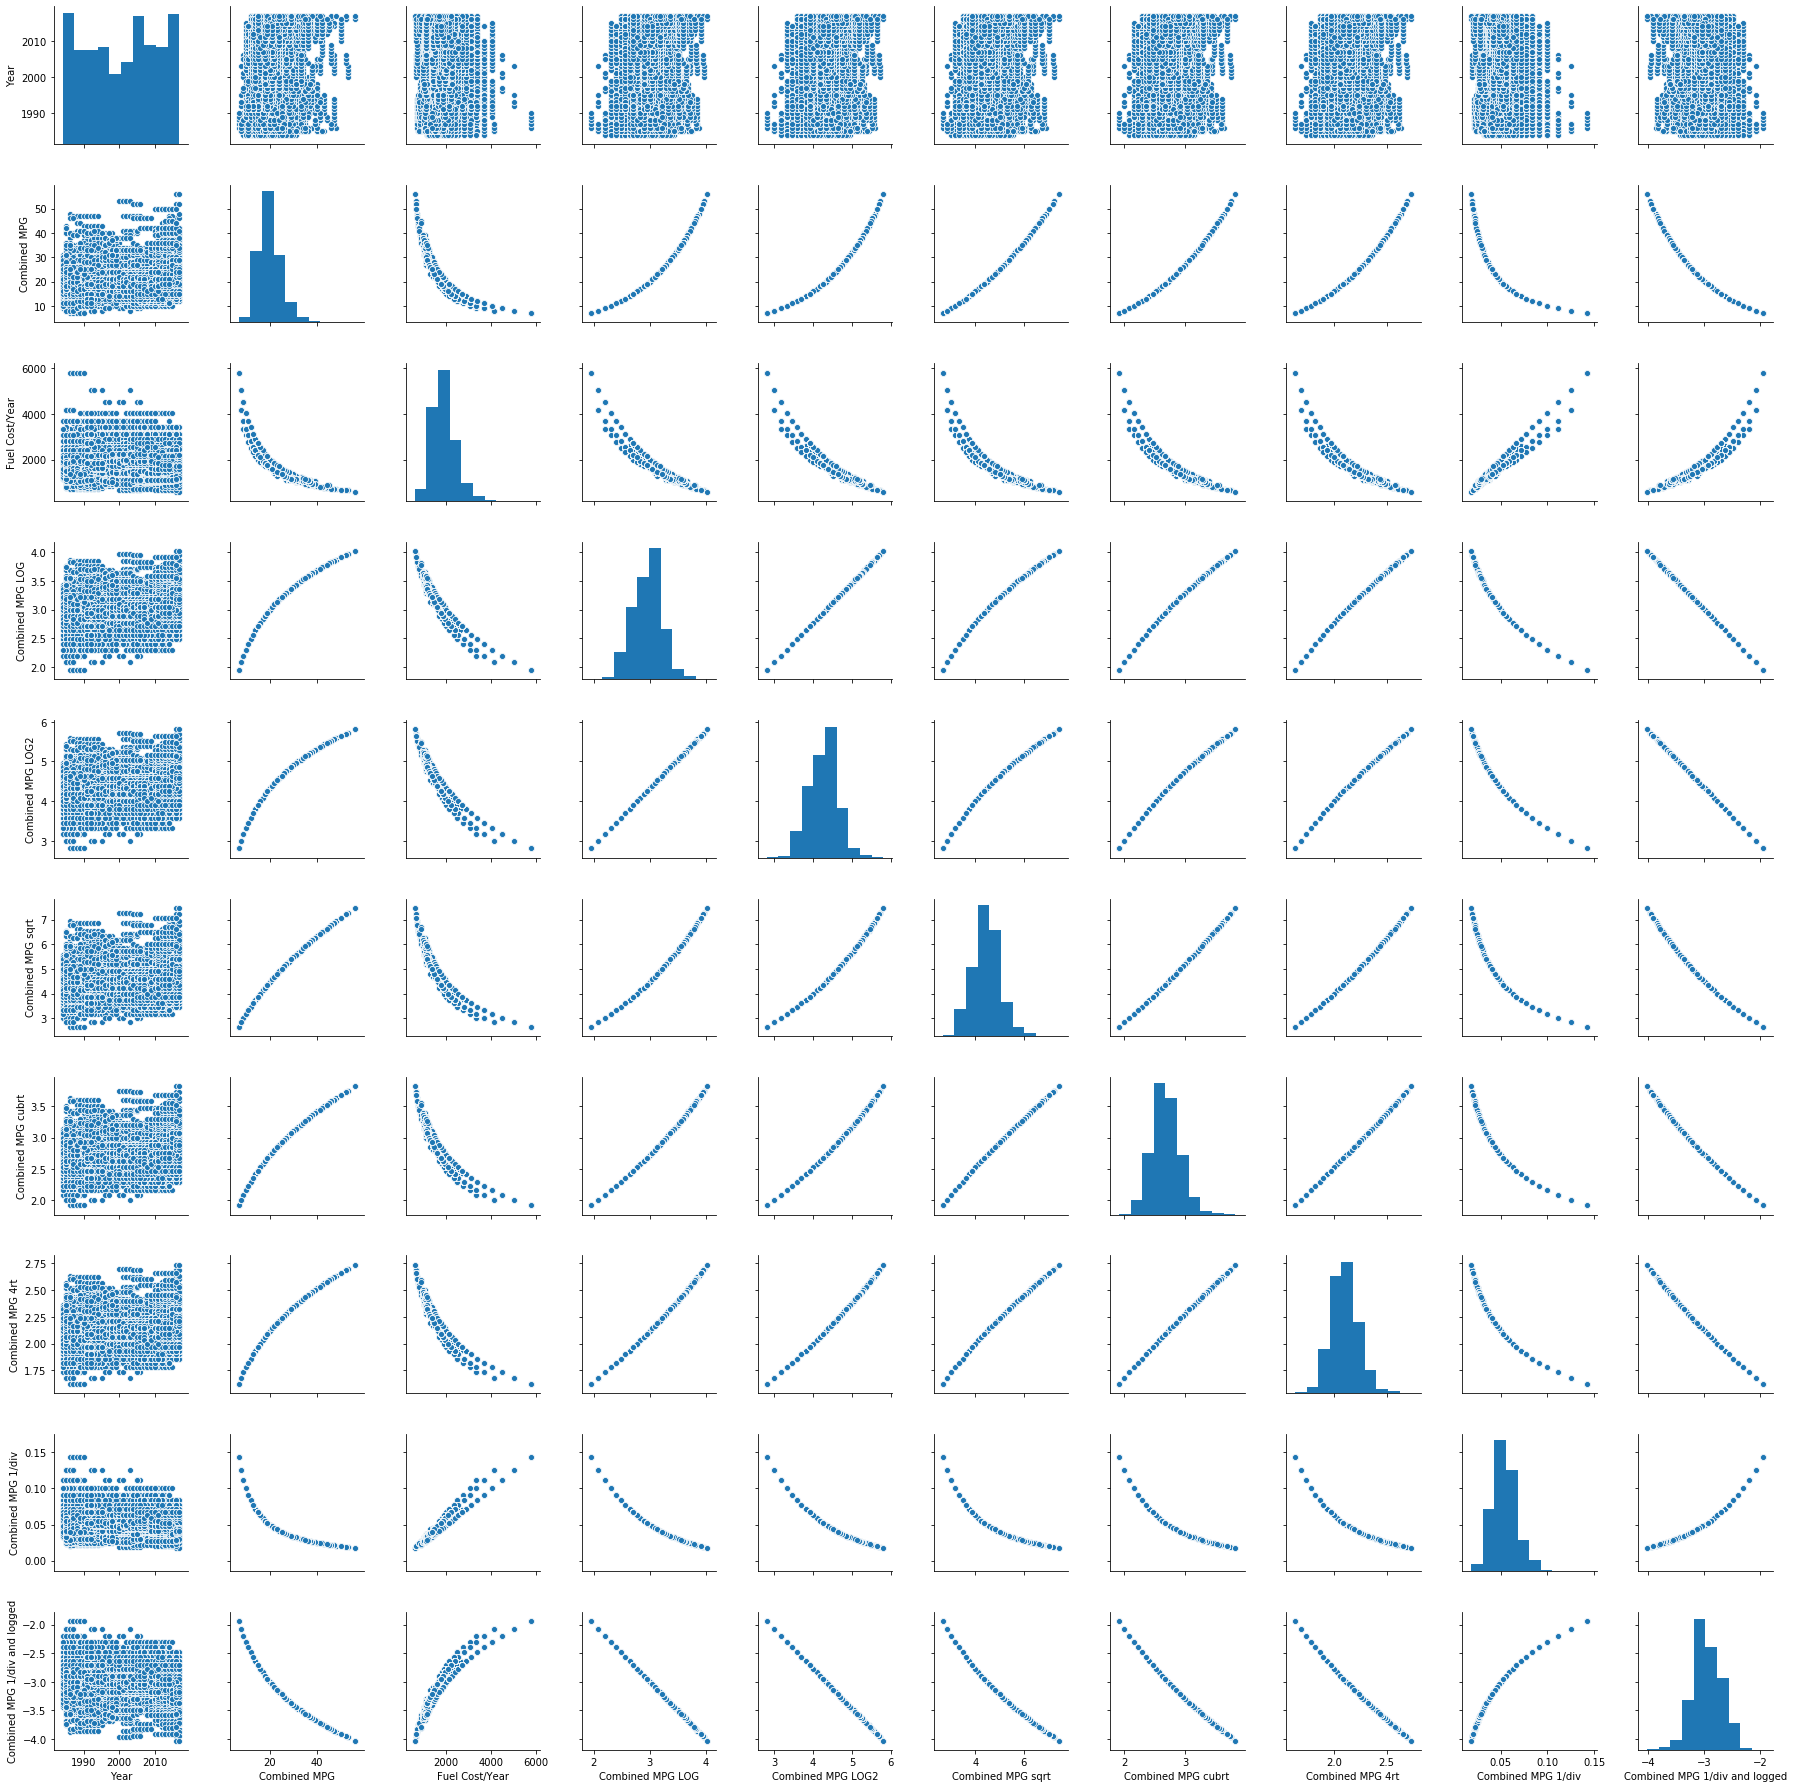

In [17]:
sns.pairplot(dfnumeric)

In [19]:
X=dfnumeric[['Combined MPG']]
Y=dfnumeric['Fuel Cost/Year']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Fuel Cost/Year   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.176e+05
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:17:59   Log-Likelihood:            -2.4883e+05
No. Observations:               35952   AIC:                         4.977e+05
Df Residuals:                   35950   BIC:                         4.977e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3622.1727      5.206    695.800      0.000    3611.969    3632.376
Combined MPG   -86.7854      0.253   -342.999      0.000     -87.281     -86.289
==============================================================================
Omnibus:                    15003.988   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            95837.263
Skew:                           1.896   Prob(JB):                         0.00
Kurtosis:                      10.043   Cond. No.                         83.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
X=dfnumeric[['Combined MPG 1/div']]
Y=dfnumeric['Fuel Cost/Year']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Fuel Cost/Year   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 2.480e+05
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:18:07   Log-Likelihood:            -2.3779e+05
No. Observations:               35952   AIC:                         4.756e+05
Df Residuals:                   35950   BIC:                         4.756e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7427      3.914      0.445      0.656      -5.929       9.415
Combined MPG 1/div  3.543e+04     71.147    498.005      0.000    3.53e+04    3.56e+04
==============================================================================
Omnibus:                     5155.856   Durbin-Watson:                   0.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6238.031
Skew:                           0.979   Prob(JB):                         0.00
Kurtosis:                       2.423   Cond. No.                         75.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## I am totally on fire!! I will scale features to increase more the accuracy 

In [22]:
X=dfnumeric[['Combined MPG 1/div', 'Year']]
Y=dfnumeric['Fuel Cost/Year']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Fuel Cost/Year   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.381e+05
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:25:20   Log-Likelihood:            -2.3608e+05
No. Observations:               35952   AIC:                         4.722e+05
Df Residuals:                   35949   BIC:                         4.722e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.105e+04    184.936    -59.736      0.000   -1.14e+04   -1.07e+04
Combined MPG 1/div   3.63e+04     69.409    523.041      0.000    3.62e+04    3.64e+04
Year                   5.4993      0.092     59.758      0.000       5.319       5.680
==============================================================================
Omnibus:                     3730.842   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4293.355
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       2.505   Cond. No.                     4.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

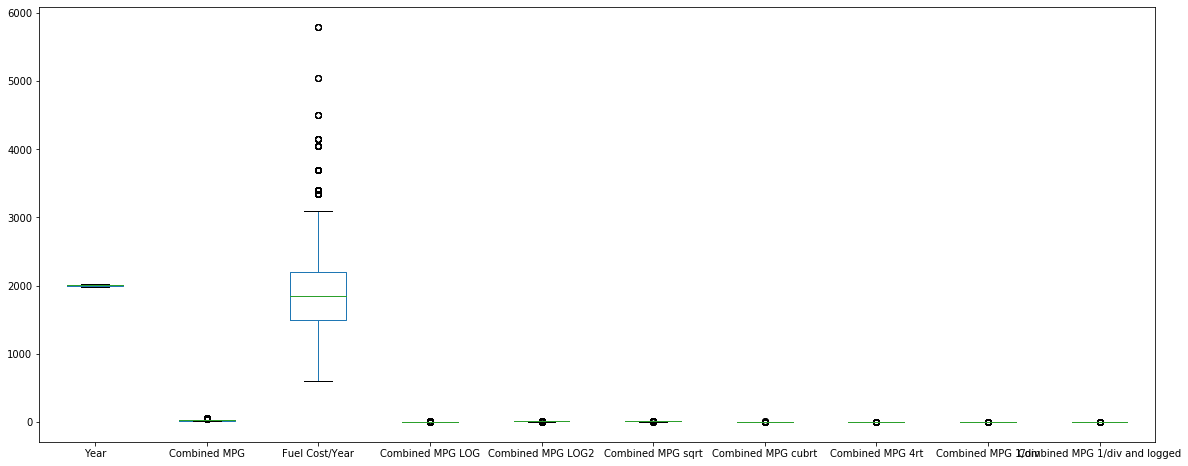

In [23]:
dfnumeric.plot.box(figsize = (20,8))

In [29]:
dfnumeric.head()

,Year,Combined MPG,Fuel Cost/Year,Combined MPG LOG,Combined MPG LOG2,Combined MPG sqrt,Combined MPG cubrt,Combined MPG 4rt,Combined MPG 1/div,Combined MPG 1/div and logged
0,1984,17,1950,2.833213,4.087463,4.123106,2.571282,2.030543,0.058824,-2.833213
1,1984,13,2550,2.564949,3.700440,3.605551,2.351335,1.898829,0.076923,-2.564949
2,1985,16,2100,2.772589,4.000000,4.000000,2.519842,2.000000,0.062500,-2.772589
3,1985,13,2550,2.564949,3.700440,3.605551,2.351335,1.898829,0.076923,-2.564949
4,1987,16,2550,2.772589,4.000000,4.000000,2.519842,2.000000,0.062500,-2.772589


In [24]:
dfnumericnorm=dfnumeric

from sklearn.preprocessing import MinMaxScaler

# create normalization object from scikit learn package, and "fit" it to the features in hand -> calculating the min, max values in each column
dfnumericnorm = MinMaxScaler().fit(dfnumeric).transform(dfnumeric)
dfnorm = pd.DataFrame(dfnumericnorm, columns = dfnumeric.columns)
dfnorm.head()

,Year,Combined MPG,Fuel Cost/Year,Combined MPG LOG,Combined MPG LOG2,Combined MPG sqrt,Combined MPG cubrt,Combined MPG 4rt,Combined MPG 1/div,Combined MPG 1/div and logged
0,0.000000,0.204082,0.259615,0.426703,0.426703,0.305392,0.344158,0.364266,0.327731,0.573297
1,0.000000,0.122449,0.375000,0.297695,0.297695,0.198406,0.229179,0.245496,0.472527,0.702305
2,0.030303,0.183673,0.288462,0.397548,0.397548,0.279944,0.317268,0.336724,0.357143,0.602452
3,0.030303,0.122449,0.375000,0.297695,0.297695,0.198406,0.229179,0.245496,0.472527,0.702305
4,0.090909,0.183673,0.375000,0.397548,0.397548,0.279944,0.317268,0.336724,0.357143,0.602452


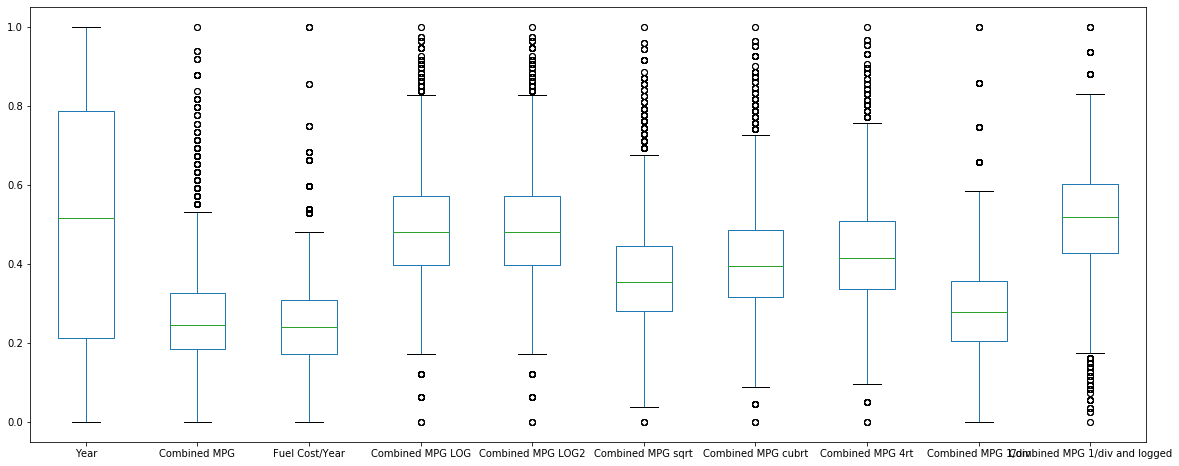

In [30]:
dfnorm.plot.box(figsize = (20,8))

In [26]:
dfnorm.columns

Index(['Year', 'Combined MPG', 'Fuel Cost/Year', 'Combined MPG LOG',
       'Combined MPG LOG2', 'Combined MPG sqrt', 'Combined MPG cubrt',
       'Combined MPG 4rt', 'Combined MPG 1/div',
       'Combined MPG 1/div and logged'],
      dtype='object')

In [31]:
X=dfnorm[['Combined MPG 1/div', 'Year']]
Y=dfnorm['Fuel Cost/Year']
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

/Users/marcherrera/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Fuel Cost/Year   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.381e+05
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:29:45   Log-Likelihood:                 71536.
No. Observations:               35952   AIC:                        -1.431e+05
Df Residuals:                   35949   BIC:                        -1.430e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0170      0.001    -26.840      0.000      -0.018      -0.016
Combined MPG 1/div     0.8727      0.002    523.041      0.000       0.869       0.876
Year                   0.0349      0.001     59.758      0.000       0.034       0.036
==============================================================================
Omnibus:                     3730.842   Durbin-Watson:                   0.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4293.355
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       2.505   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dfnumeric.columns